# **SimBot-1 Notebook Answers**
***

Including the two cells cells that contain the Robot and DDrobot classes, and their associated formatting:

In [1]:
"""Header cell, contains modules and functions to make the whole notebook experience better"""
%matplotlib inline 
# plots graphs within the notebook

from IPython.display import display,Image, Latex
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc


import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
    
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size
    
    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)
    
    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    

In [ ]:
import matplotlib.pyplot as plt #enables plotting capabilities for the robot
                                #for this case this is the OUTPUT as the whole 
                                #robot is simulated through this notebook
import numpy as np #Numerical Python library as described in the Intro Python Notebook
import math #math module 
import scipy.constants as sc #shortcut for physical and mathematical constants 
                             #and units
import sympy as sym #SymPy is a Python library for symbolic mathematics

from math import sin, cos

class Robot(object):
    """Defines basic mobile robot properties. Defines __init__, step, print_xya, and 
    plot_robot methods. Is called in the main class of DDRobot."""
    def __init__(self):
        #initialization class. 
        self.pos_x  = 0.0 #placing bot at origin: (x,y) = (0,0)
        self.pos_y  = 0.0 
        self.angle  = 0.0 # IN RAD setting alpha = 0
        self.plot   = False #intializing no plot to show
        self._delta = 0.01 #
        self.step_plot = int(8) #plotting every 5 iterations
        self.mag_plot = 1.5 # arrow magnification

    # Movement
    def step(self):
        """ updates the x,y and alpha """
        self.deltax()
        self.deltay()
        self.deltaa()

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds. Takes argument of seconds as type 
        int"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if i % self.step_plot == 0 and self.plot: # plot path every 5 steps
                self.plot_xya() #plots a dot in the position of the robot 

    # Printing-and-plotting:
    def print_xya(self):
        """ prints the x,y position and angle """
        print ("x = " + str(self.pos_x) +" "+ "y = " + str(self.pos_y))
        print ("a = " + str(self.angle))
        
    def plot_robot(self):
        """ plots an arrow representation of the robot. """
        plt.arrow(self.pos_x, self.pos_y, 0.001
                  * cos(self.angle), 0.001 * sin(self.angle),
                  head_width=self.mag_plot*self.length, head_length=self.mag_plot*self.length,
                  fc='k', ec='k')

    def plot_xya(self):
        """ plots a dot in the position of the robot """
        plt.scatter(self.pos_x, self.pos_y, c='r', edgecolors='r')


class DDRobot(Robot):
    """Defines a differential drive robot. Is the main class. Moves the robot. 
    Class Robot is effectively created within class DDRobot as many of the 
    methods from Robot class are called within DDRobot class."""
    
    def __init__(self):
        """__init__ : Initialization class (for DDRobot class)"""
        Robot.__init__(self)
        self.radius = 0.1 #radius of bot wheel as defined in Fig 3
        self.length = 0.4 #length between bot wheels as defined in Fig 3
        self.rt_spd_left = 0.0 #initializing rotation speed, left wheel to 0
        self.rt_spd_right = 0.0 #initializing rotation speed, right wheel to 0

    def deltax(self):
        """ update x position depending on L and R angular speeds """
        self.pos_x += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*cos(self.angle)

    def deltay(self):
        """ update y position depending on l and r angular speeds """
        self.pos_y += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*sin(self.angle)

    def deltaa(self):
        """ update angle depending on l and r angular speeds """
        self.angle += self._delta * (self.radius/self.length) \
        * (self.rt_spd_right - self.rt_spd_left)

def D2R(a):
    """function to convert degrees to radians. Takes single argument of degrees."""
    return (math.pi*a)/180
def R2D(a):
    """Function to convert radians to degrees. Takes single argument of radians."""
    return 180*a/math.pi


<br>
<br>
<br>

***

<br>
<br>

### **Q1: Executing a turn:** Make a turn for 3 seconds using the above code as a framework:

*Required components of answer:*<br>
• mybot.rt_spd_left and mybot.rt_spd_right must have different scalar definitions <br>
• mybot.move(3)

In [ ]:
# object instantiation
mybot = DDRobot()             # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
# initialization block
mybot.pos_x = 5               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5               # calling pos_y method to set y initial position - in center of plot
mybot.angle = 0               # initial starting direction: 0 degrees 
mybot.plot = True             # turning on plot
mybot.mag_plot = 1.5          # coefficient of magnification of the arrow
mybot.step_plot = 20          # plotting robot's location every 20 steps
mybot.plot_robot()            # plotting the robot!

# movement block
mybot.rt_spd_left = 6*math.pi        # setting rotational speed of motors to 10
mybot.rt_spd_right = 4*math.pi       # setting rotational speed of motors to 10
mybot.move(3)                 # move for 3 seconds at set specifications
mybot.plot_robot()            # plotting robot's movement 

#resizing plot block
plt.xlim([0, 10])             # axis limits
plt.ylim([0, 10])
plt.rcParams["figure.figsize"] = (10,10)

plt.show()                    # plotting full course of robots path 

### **Q2: Square:** Now that you have completed a straight line and a turn, you have all the components to complete a square. Synthesize the two blocks of code to transcribe a square:

In [ ]:
#object instantiation
mybot = DDRobot()                # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
#initialization block
mybot.pos_x = 5               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5               # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(90)         # initial starting direction: 0 radians
mybot.plot = True             # turning on plot
mybot.mag_plot = .5           # coefficient of magnification of the arrow
mybot.step_plot = 20          # plotting robot's location every 20 steps
mybot.plot_robot()            # plotting the robot!
#movement block: 
    #1 side
#straight line
mybot.rt_spd_left = 10        # power 10 to left wheel
mybot.rt_spd_right = 10       # power 10 to right wheel
mybot.move(4)                 # move for 4 seconds
#1/4 of 2m diameter circle
mybot.rt_spd_left = 6*math.pi 
mybot.rt_spd_right = 4*math.pi
mybot.move(1)                 # move for 1 second
    #1 side
#straight line
mybot.rt_spd_left = 10        # power 10 to left wheel
mybot.rt_spd_right = 10       # power 10 to right wheel
mybot.move(4)                 # move for 4 seconds
#1/4 of 2m diameter circle
mybot.rt_spd_left = 6*math.pi 
mybot.rt_spd_right = 4*math.pi
mybot.move(1)                 # move for 1 second
    #1 side
#straight line
mybot.rt_spd_left = 10        # power 10 to left wheel
mybot.rt_spd_right = 10       # power 10 to right wheel
mybot.move(4)                 # move for 4 seconds
#1/4 of 2m diameter circle
mybot.rt_spd_left = 6*math.pi 
mybot.rt_spd_right = 4*math.pi
mybot.move(1)                 # move for 1 second
    #1 side
#straight line
mybot.rt_spd_left = 10        # power 10 to left wheel
mybot.rt_spd_right = 10       # power 10 to right wheel
mybot.move(4)                 # move for 4 seconds
#1/4 of 2m diameter circle
mybot.rt_spd_left = 6*math.pi 
mybot.rt_spd_right = 4*math.pi
mybot.move(1)                 # move for 1 second
    #1 side
#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 20])             # axis limits
plt.ylim([0, 20])
plt.rcParams["figure.figsize"] = (20,20) # forcing size as square
plt.show()
# print('absolute error x: %1.1e m' %(math.sqrt(mybot.pos_x**2 +mybot.pos_y**2))) # checking absolute 
                                # error between start position and end position

### **Q3: For loop:** Instead of repeating the two blocks of code 6 times, write a for loop to transcribe a hexagon using the movement block:
If you need a refresher on for loops review Intro Notebook 3.

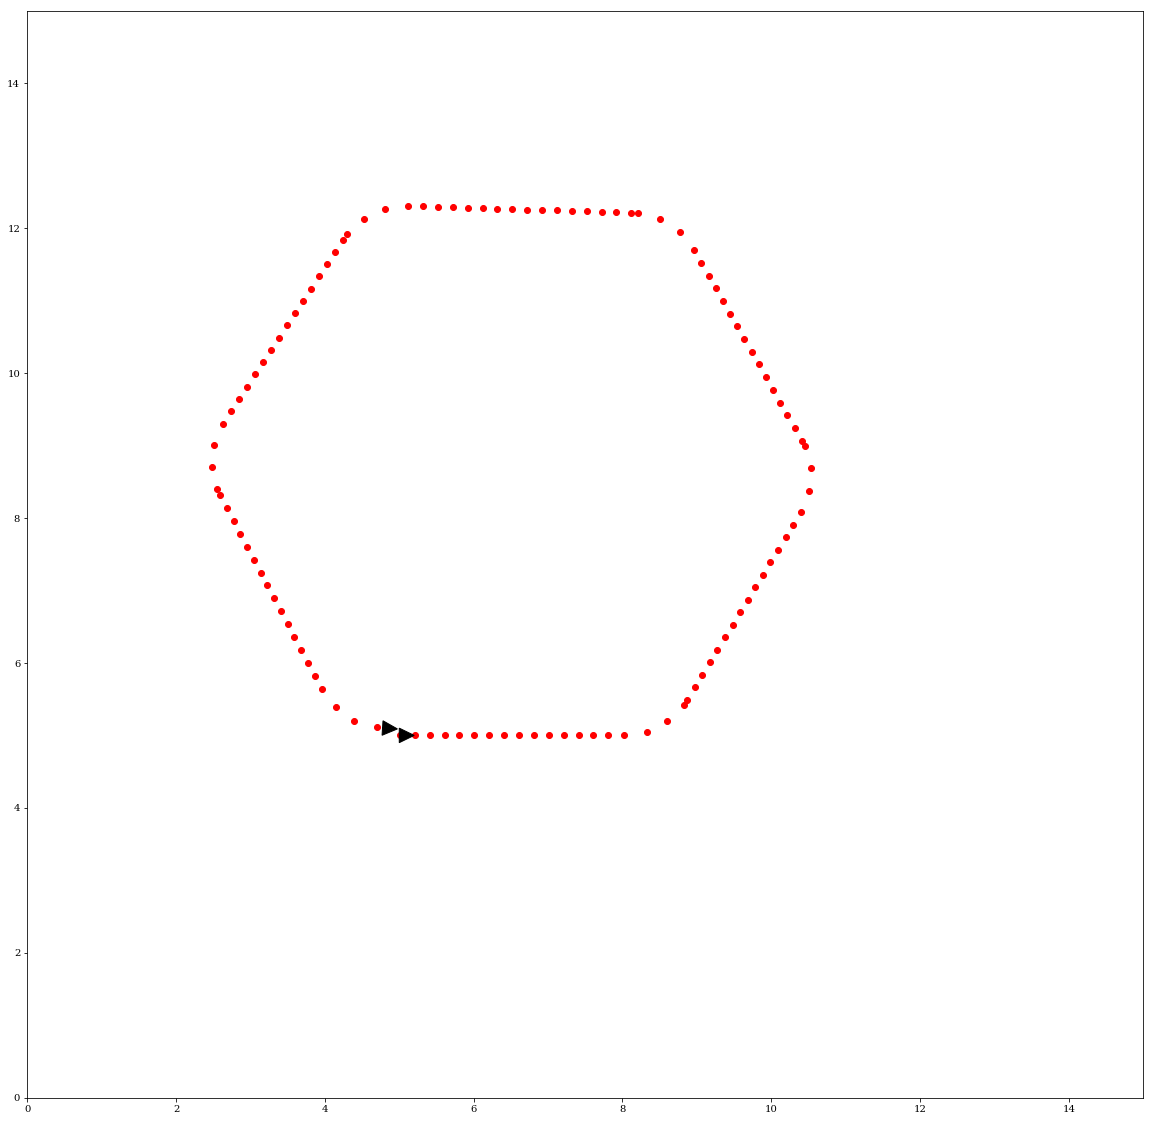

In [28]:
#object instantiation
mybot = Turn()                # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
#initialization block
mybot.pos_x = 5               # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 5               # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(0)          # initial starting direction: 0 radians
mybot.plot = True             # turning on plot
mybot.mag_plot = .5           # coefficient of magnification of the arrow
mybot.step_plot = 20          # plotting robot's location every 20 steps
mybot.plot_robot()            # plotting the robot!

s_length = 3
theta = D2R(60)
t = ((theta*2)/math.pi)
for i in range(6):     
        #forward
    mybot.rt_spd_left = 10     
    mybot.rt_spd_right = 10
    mybot.move(s_length)
        #turn left
    #2/4 of 2m diameter circle ccw: 0 -> Pi rad
    mybot.rt_spd_left = 4*math.pi 
    mybot.rt_spd_right = 6*math.pi
    mybot.move(t)                 # move for 2 seconds (half circ or Pi rad)

#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 15])             # axis limits
plt.ylim([0, 15])
plt.rcParams["figure.figsize"] = (15,15) # forcing size as square
plt.show()

### Creating the Turn class, defining the turn_right, turn_left and forward methods that are used in the following questions:
<br>

In [46]:
import matplotlib.pyplot as plt #enables plotting capabilities for the robot
                                #for this case this is the OUTPUT as the whole 
                                #robot is simulated through this notebook
import numpy as np #Numerical Python library as described in the Intro Python Notebook
import math #math module 
import scipy.constants as sc #shortcut for physical and mathematical constants 
                             #and units
import sympy as sym #SymPy is a Python library for symbolic mathematics

from math import sin, cos

class Robot(object):
    """Defines basic mobile robot properties. Defines __init__, step, print_xya, and 
    plot_robot methods. Is called in the main class of DDRobot."""
    def __init__(self):
        #initialization class. 
        self.pos_x  = 0.0 #placing bot at origin: (x,y) = (0,0)
        self.pos_y  = 0.0 
        self.angle  = 0.0 # IN RAD setting alpha = 0
        self.plot   = False #intializing no plot to show
        self._delta = 0.01 #
        self.step_plot = int(5) #plotting every 5 iterations
        self.mag_plot = 1.5 # arrow magnification

    # Movement
    def step(self):
        """ updates the x,y and alpha """
        self.deltax()
        self.deltay()
        self.deltaa()

    def move(self, seconds):
        """ Moves the robot for an 's' amount of seconds. Takes argument of seconds as type 
        int"""
        for i in range(int(seconds/self._delta)):
            self.step()
            if i % self.step_plot == 0 and self.plot: # plot path every 5 steps
                self.plot_xya() #plots a dot in the position of the robot 

    # Printing-and-plotting:
    def print_xya(self):
        """ prints the x,y position and angle """
        print ("x = " + str(self.pos_x) +" "+ "y = " + str(self.pos_y))
        print ("a = " + str(self.angle))
        
    def plot_robot(self):
        """ plots an arrow representation of the robot. """
        plt.arrow(self.pos_x, self.pos_y, 0.001
                  * cos(self.angle), 0.001 * sin(self.angle),
                  head_width=self.mag_plot*self.length, head_length=self.mag_plot*self.length,
                  fc='k', ec='k')

    def plot_xya(self):
        """ plots a dot in the position of the robot """
        plt.scatter(self.pos_x, self.pos_y, c='r', edgecolors='r')


class DDRobot(Robot):
    """Defines a differential drive robot. Helps move the robot. 
    Class Robot is effectively created within class DDRobot as many of the 
    methods from Robot class are called within DDRobot class."""
    
    def __init__(self):
        """__init__ : Initialization class (for DDRobot class)"""
        Robot.__init__(self)
        self.radius = 0.1 #radius of bot wheel as defined in Fig 3
        self.length = 0.4 #length between bot wheels as defined in Fig 3
        self.rt_spd_left = 0.0 #initializing rotation speed, left wheel to 0
        self.rt_spd_right = 0.0 #initializing rotation speed, right wheel to 0

    def deltax(self):
        """ update x position depending on L and R angular speeds """
        self.pos_x += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*cos(self.angle)

    def deltay(self):
        """ update y position depending on l and r angular speeds """
        self.pos_y += self._delta * (self.radius*0.5) \
        * (self.rt_spd_right + self.rt_spd_left)*sin(self.angle)

    def deltaa(self):
        """ update angle depending on l and r angular speeds """
        self.angle += self._delta * (self.radius/self.length) \
        * (self.rt_spd_right - self.rt_spd_left)
        
        ### Turning Methods: 
        
class Turn(DDRobot):
    """Defines methods that move robot with fewer lines of code by defining specific actions into methods. 
    Calls DDRobot and its methods"""
    def __init__(self):
        """Initializes Turn class with DDRobot class object"""
        DDRobot.__init__(self)
        
    def turn_right(self,a_R):
        """Turns mybot a specified angle to the right. Args: a_R, desired angle of turn to Right """
            # takes input of degrees, converts to Radians
#         a_R = D2R(float(input("Enter the desired angle of rotation to the right (in degrees): "))) 
        self.rt_spd_left = 6*math.pi # initializing left rotational speed at 4*pi
        self.rt_spd_right = 4*math.pi # initializing left rotational speed at 6*pi
        t = ((a_R - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_left - mybot.rt_spd_right))
        # Time of Turn eq:
        self.move(t) # move for t seconds

    def turn_left(self,a_L):
        """Turns mybot a specified angle to the left. Args: a_L, desired angle of turn Left """
            # takes input of degrees, converts to Radians
#         a_L = D2R(float(input("Enter the desired angle of rotation to the left (in degrees): "))) 
        self.rt_spd_left = 4*math.pi # initializing left rotational speed at 4*pi
        self.rt_spd_right = 6*math.pi # initializing left rotational speed at 6*pi
        t = ((a_L - 0)*mybot.length)/(mybot.radius*(mybot.rt_spd_right - mybot.rt_spd_left))
        # Time of Turn eq:s
        self.move(t) # move for t seconds

    def forward(self,f_time):
        """Drives robot straight ahead for specified amount of time. Takes argument of f_time in seconds"""
#         f_time = int(input("Enter the desired time to move forward: "))
        self.rt_spd_left = 10
        self.rt_spd_right = 10
        self.move(f_time)


def D2R(a):
    """function to convert degrees to radians. Takes single argument of degrees."""
    return (math.pi*a)/180
def R2D(a):
    """Function to convert radians to degrees. Takes single argument of radians."""
    return 180*a/math.pi



### **Q4: Use turn and forward methods to complete a hexagon using a for loop:**
We have completed a for loop for a hexagon, and now defined methods for completing turns of user inputted angles and forward motion for user inputted time. <br>
Synthesize the code required to **take user input for number of desired sides, side length, then complete a hexagon using a for loop and plot its course, using mybot as the object, and the forward(), turn_right() or turn_left() methods.** You are welcome to use the initialization and plotting code blocks from previous exercises. 

Enter the desired side length:  1


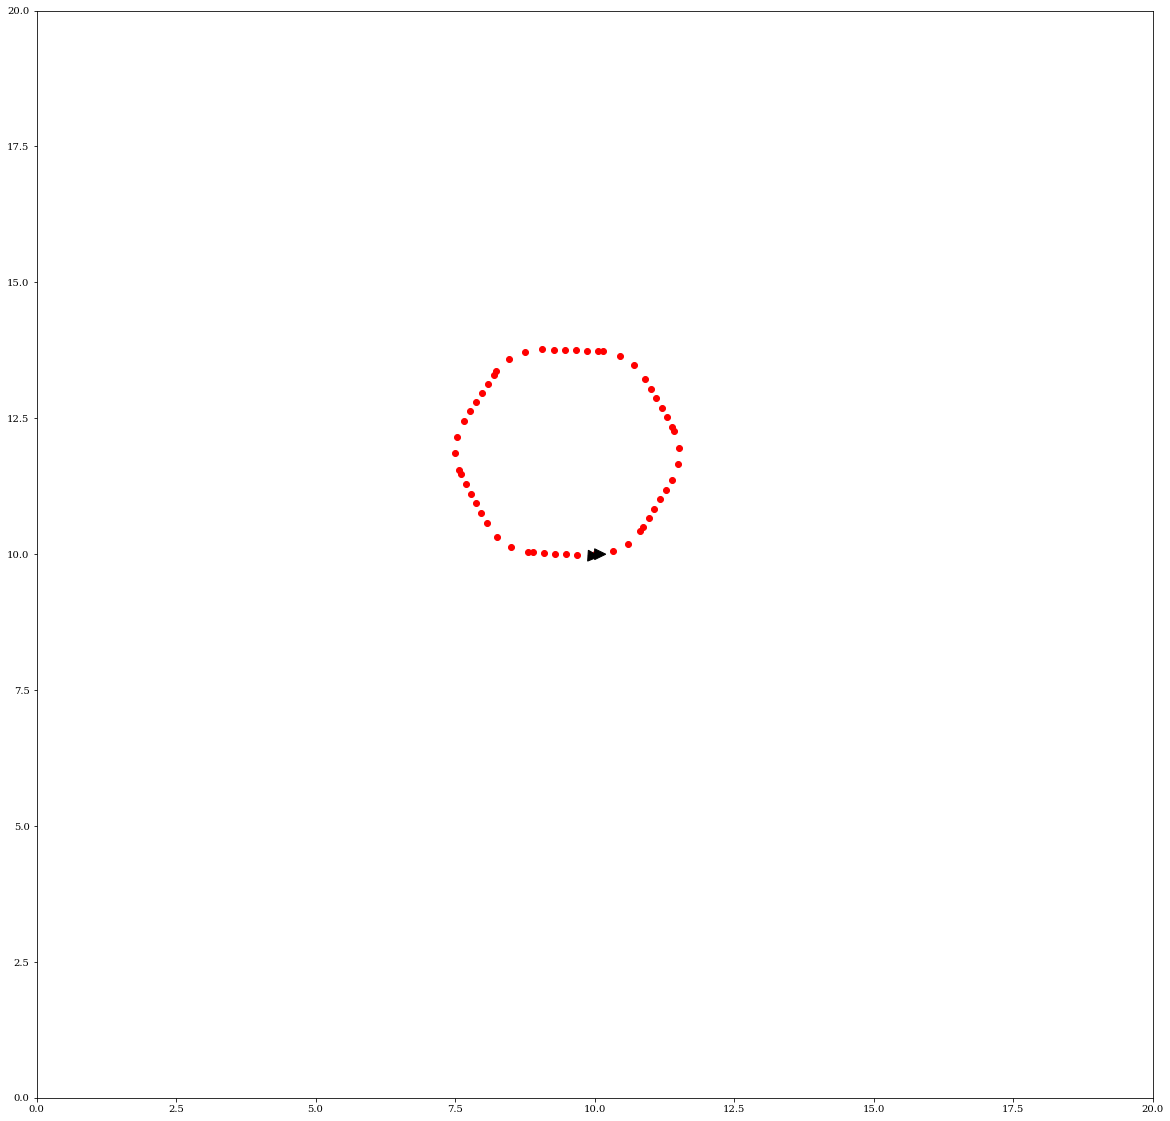

In [50]:
#object instantiation
mybot = Turn()                # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
#initialization block
mybot.pos_x = 10              # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 10              # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(0)          # initial starting direction: 0 radians
mybot.plot = True             # turning on plot
mybot.mag_plot = .5           # coefficient of magnification of the arrow
mybot.step_plot = 20
mybot.plot_robot()            # plotting the robot!

mybot.a_L = D2R(float(60))#calculating inner turn angled converting to radians
mybot.f_time = int(input("Enter the desired side length: ")) #taking input for side length before the loop 
                                #to avoid requiring user input for each iteration
mybot.i = 0 #initializing counter
for mybot.i in range(6): #executes an iteration for desired number of sides 
#     mybot.turn_left(mybot.a_L) #turning left specified radians
    mybot.turn_left(mybot.a_L) #turning right specified radians
    mybot.forward(mybot.f_time) #drive forward for specified time, transcribing desired side length
#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 20])             # x-axis limit
plt.ylim([0, 20])             # y-axis limit
plt.rcParams["figure.figsize"] = (20,20) # forcing size as square of specified parameters
plt.show() # showing plot

### **Q5: n Sided Polygon:** Write a script using a **for loop** and the turning methods that transcribes a polygon with n number of sides:

Enter the number of sides of desired polygon:  8
Enter the desired side length:  2


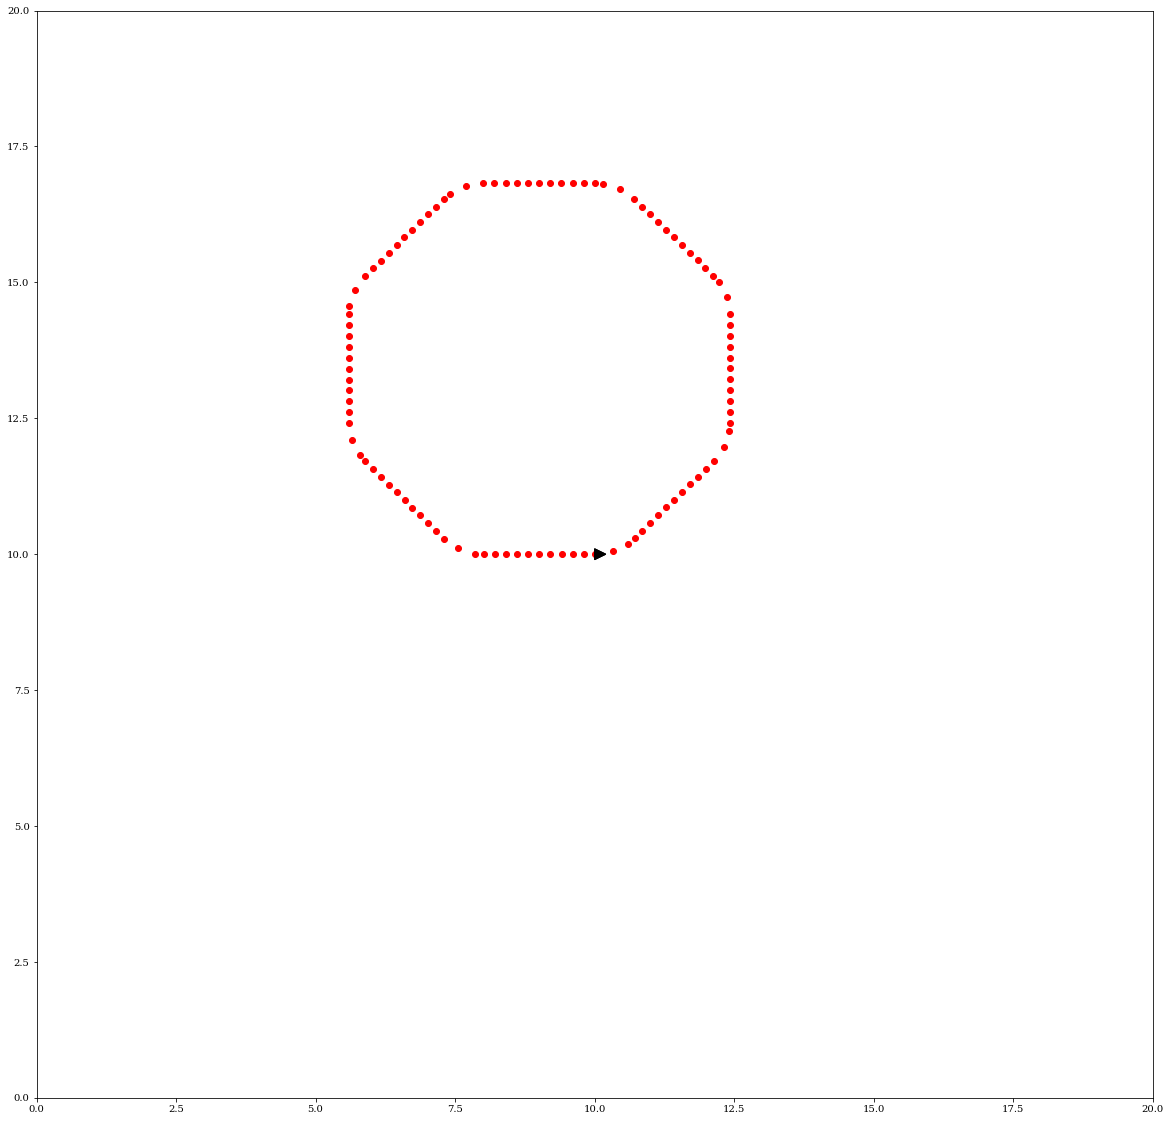

In [55]:
#object instantiation
mybot = Turn()                # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
#initialization block
mybot.pos_x = 10              # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 10              # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(0)          # initial starting direction: 0 radians
mybot.plot = True             # turning on plot
mybot.mag_plot = .5           # coefficient of magnification of the arrow
mybot.step_plot = 20
mybot.plot_robot()            # plotting the robot!

n = int(input("Enter the number of sides of desired polygon: ")) #specifying side length. 
a_L = D2R(float(360/mybot.n))#calculating inner turn angle and converting to radians. 
f_time = int(input("Enter the desired side length: ")) #taking input for side length before the loop 
                                #to avoid requiring user input for each iteration
mybot.i = 0 #initializing counter
for mybot.i in range(mybot.n): #executes an iteration for desired number of sides 
    mybot.turn_left(mybot.a_L) #turning right specified radians
    mybot.forward(mybot.f_time) #drive forward for specified time, transcribing desired side length
#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 20])             # x-axis limit
plt.ylim([0, 20])             # y-axis limit
plt.rcParams["figure.figsize"] = (20,20) # forcing size as square of specified parameters
plt.show() # showing plot

### **Q6: n Sided Polygon *while* loop:** Write a script using a *while* loop and the turning methods that transcribes a polygon with n number of sides:
The body of the code can be reused from question 5. We must replace the for loop structure with a while loop and it's necessary commands. 

Enter the number of sides of desired polygon:  8
Enter the desired side length:  2


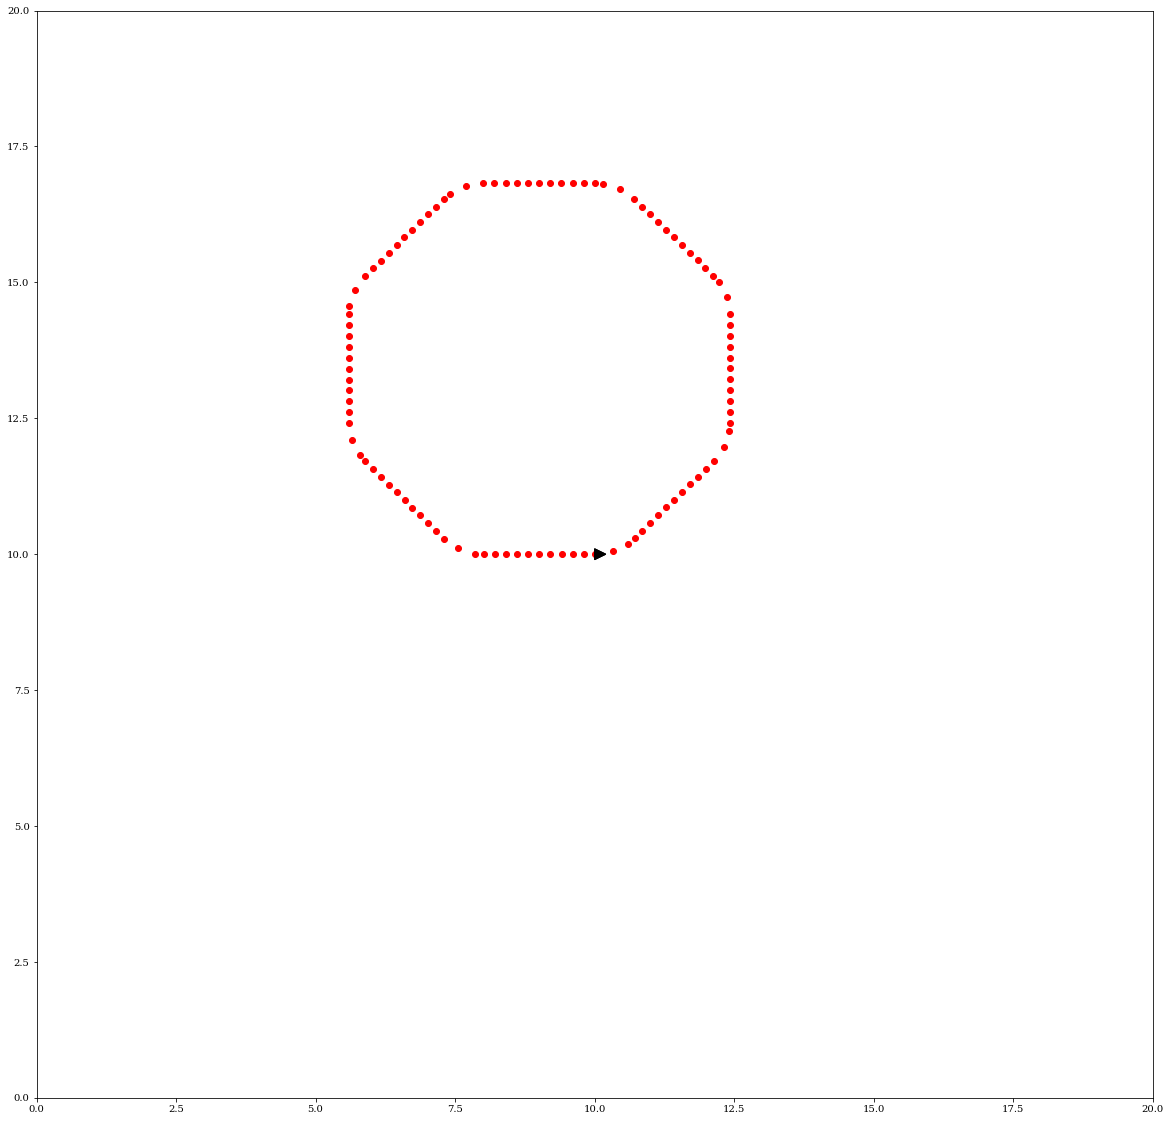

In [53]:
#object instantiation
mybot = Turn()                # enables methods to be passed to the Robot, DDRobot, and Turn classes as objects
#initialization block
mybot.pos_x = 10              # calling pos_x method to set x initial position - in center of plot
mybot.pos_y = 10              # calling pos_y method to set y initial position - in center of plot
mybot.angle = D2R(0)          # initial starting direction: 0 radians
mybot.plot = True             # turning on plot
mybot.mag_plot = .5           # coefficient of magnification of the arrow
mybot.step_plot = 20
mybot.plot_robot()            # plotting the robot!

mybot.n = int(input("Enter the number of sides of desired polygon: ")) #specifying side length. Object attribute 
mybot.a_L = D2R(float(360/mybot.n))#calculating inner turn angle and converting to radians. Object attribute
mybot.f_time = int(input("Enter the desired side length: ")) #taking input for side length before the loop 
                                #to avoid requiring user input for each iteration
mybot.i = 0 #initializing counter
while mybot.i < mybot.n: #executes an iteration for desired number of sides 
    mybot.turn_left(mybot.a_L) #turning left specified radians
    mybot.forward(mybot.f_time) #drive forward for specified time, transcribing desired side length
    mybot.i += 1 #adding to counter
#plotting block
mybot.plot_robot()            # plot robot's entire path
plt.xlim([0, 20])             # x-axis limit
plt.ylim([0, 20])             # y-axis limit
plt.rcParams["figure.figsize"] = (20,20) # forcing size as square of specified parameters
plt.show() # showing plot